# Example of load model for detections



In [1]:
import time
import os
import argparse
import json
import cv2
import sys
sys.path += [os.path.abspath('../keras-yolo3-master')]

from utils.utils import get_yolo_boxes, makedirs
from utils.bbox import draw_boxes
from tensorflow.keras.models import load_model
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

#detection_orto(infer_model, orto_image, div = [5,5], net_h = net_h, net_w = net_w, anchors
 #              obj_thresh = obj_thresh, nms_thresh = nms_thresh)
    

    
    
def detection_orto (infer_model, orto_image, div, net_h, net_w, anchors, obj_thresh, nms_thresh):
    
    div_h, div_w = div
    
    new_shape = [int(orto_image.shape[0] / div_h), int(orto_image.shape[1] / div_w)]
    
    final_boxes = []
    
    for h in range(div_h):
        for w in range(div_w):
            
            image = orto_image[new_shape[0]*h: new_shape[0]*(h + 1), new_shape[1]*w : new_shape[1]*(w + 1)]
            boxes = get_yolo_boxes(infer_model, [image], net_h, net_w, anchors, obj_thresh, nms_thresh)[0]
            
            for box in boxes:
                box.xmin += new_shape[1]*w
                box.xmax += new_shape[1]*w
                box.ymin += new_shape[0]*h
                box.ymax += new_shape[0]*h
                final_boxes.append(box)
    return final_boxes


## ORTO PHOTO

(-0.5, 1188.5, 830.5, -0.5)

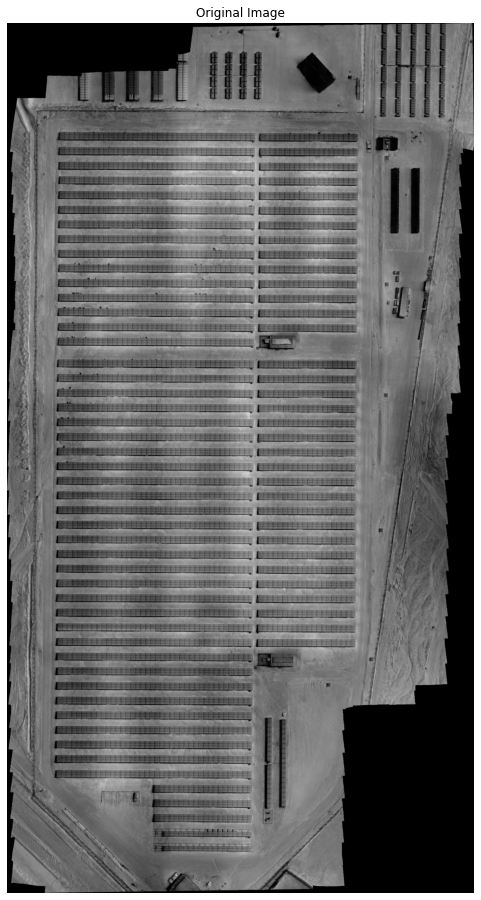

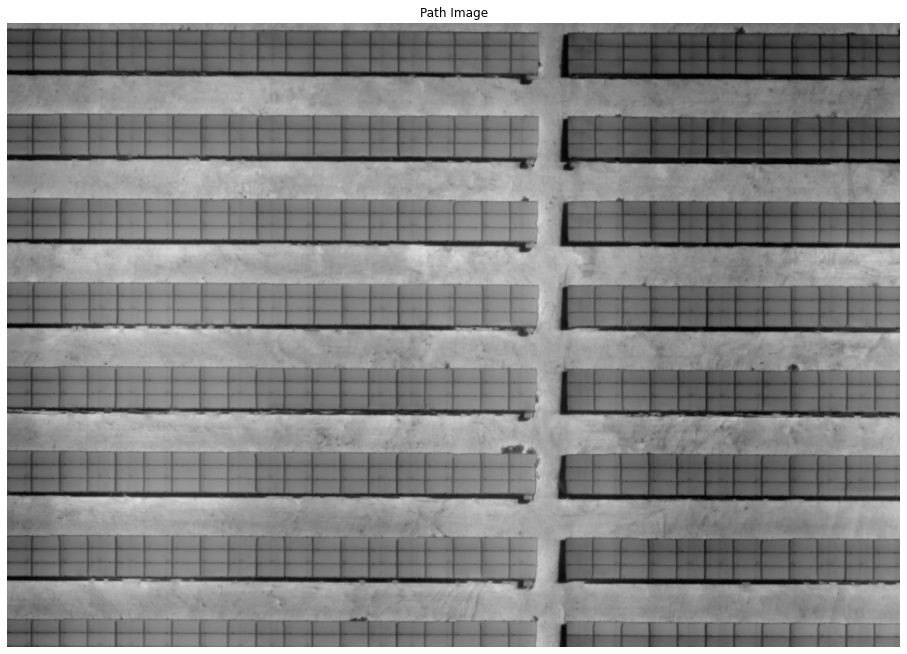

In [2]:
#image_path = 'odm_orthophoto.tif' 
image_path = '../GPS_Panel/El_Aguila_2020/Thermo.tif' 
image = cv2.imread(image_path)

#image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
#cv2.imwrite(image_path, image)

div = (8, 3) # divide row, column


fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Original Image')
plt.imshow(image, cmap='gray')
ax.axis('off') 

i = 1
sub_image = image[int(image.shape[0] / div[0]) * i : int(image.shape[0] / div[0]) * (i + 1),
                  int(image.shape[1] / div[1]) * i:int(image.shape[1] / div[1]) * (i + 1)]
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Path Image')
plt.imshow(sub_image, cmap='gray')
ax.axis('off') 

## Load Trained Model Soiling Fault

In [3]:
## Config of trained model, change this for use different trained model
config_path  = 'config_full_yolo_fault_1_infer.json' 

with open(config_path) as config_buffer:
        config = json.load(config_buffer)
                

###############################
#####   Load the model   ######
###############################
os.environ['CUDA_VISIBLE_DEVICES'] = config['train']['gpus']
infer_model = load_model(config['train']['saved_weights_name'])

## Parameters of detection
net_h, net_w = 416, 416 # a multiple of 32, the smaller the faster
obj_thresh, nms_thresh = 0.5, 0.45


#infer_model.summary()

## Detection Soling Fault

Elapsed time = 36.85330891609192


(-0.5, 3568.5, 6650.5, -0.5)

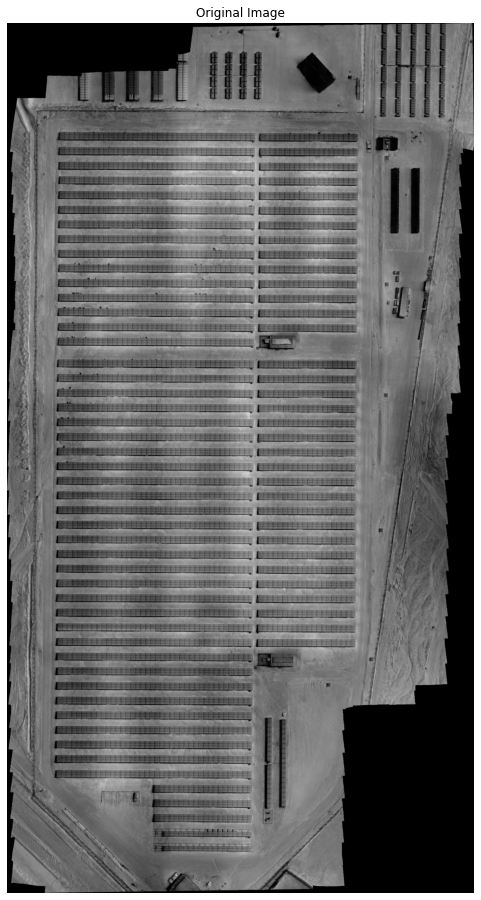

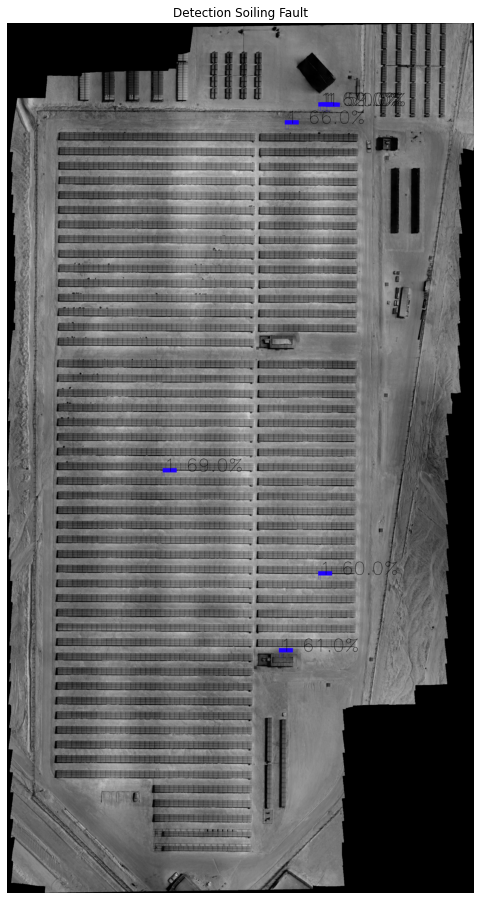

In [4]:
image = cv2.imread(image_path)

## Show original image
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Original Image')
plt.imshow(image, cmap='gray')
ax.axis('off') 

start = time.time()
## predict the bounding boxes
#boxes = get_yolo_boxes(infer_model, [image], net_h, net_w, config['model']['anchors'], obj_thresh, nms_thresh)[0]
boxes = detection_orto(infer_model, orto_image = image, div = div, net_h = net_h, net_w = net_w, 
               anchors = config['model']['anchors'], obj_thresh = obj_thresh, nms_thresh = nms_thresh)
print('Elapsed time = {}'.format(time.time() - start))
## draw bounding boxes on the image using labels
draw_boxes(image, boxes, config['model']['labels'], obj_thresh)


## Show Detection Fault
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Detection Soiling Fault')
plt.imshow(image, cmap='gray')
ax.axis('off') 
#plt.imsave('Diode Fault_6.png', image)

## Load Trained Model Diode Fault

In [5]:
## Config of trained model, change this for use different trained model
config_path  = 'config_full_yolo_fault_4_infer.json' 

with open(config_path) as config_buffer:
        config = json.load(config_buffer)
                

###############################
#####   Load the model   ######
###############################
os.environ['CUDA_VISIBLE_DEVICES'] = config['train']['gpus']
infer_model = load_model(config['train']['saved_weights_name'])

#infer_model.summary()

## Parameters of detection
net_h, net_w = 416, 416 # a multiple of 32, the smaller the faster
obj_thresh, nms_thresh = 0.5, 0.45

## Detection Diode Fault

Elapsed time = 35.52854108810425


(-0.5, 3568.5, 6650.5, -0.5)

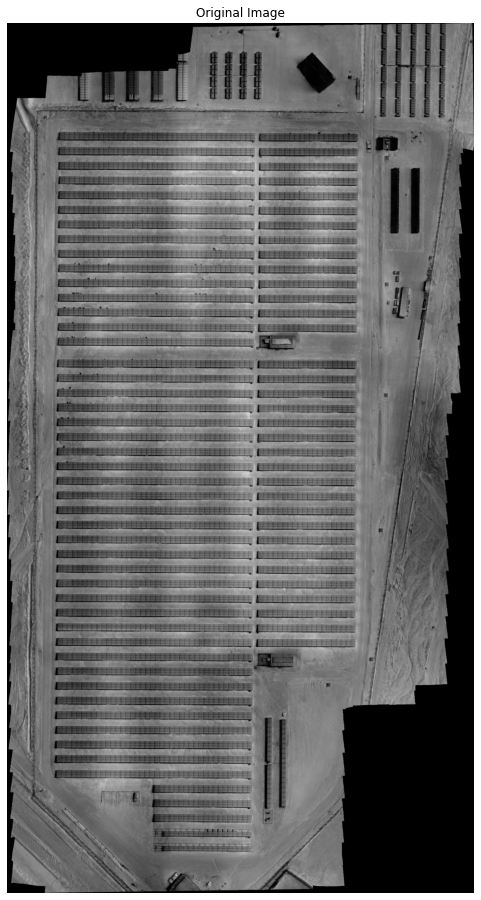

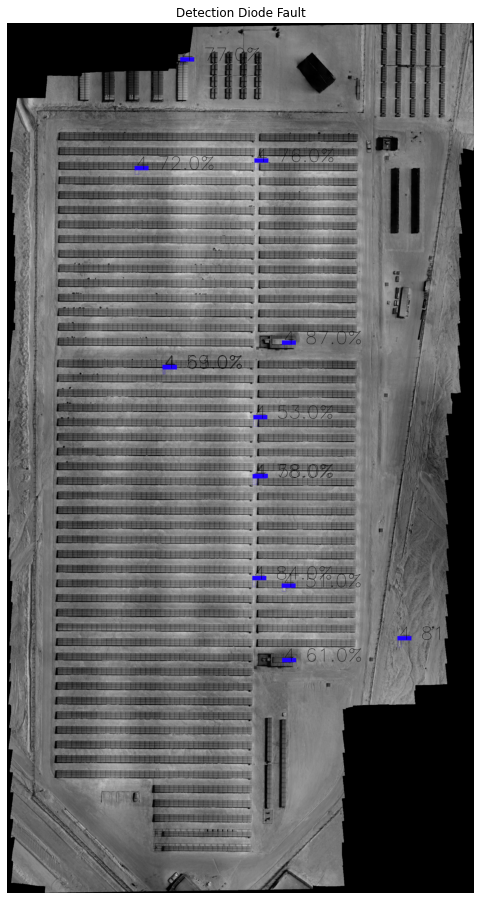

In [6]:
image = cv2.imread(image_path)


## Show original image
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Original Image')
plt.imshow(image, cmap='gray')
ax.axis('off') 

start = time.time()
## predict the bounding boxes
#boxes = get_yolo_boxes(infer_model, [image], net_h, net_w, config['model']['anchors'], obj_thresh, nms_thresh)[0]
boxes = detection_orto(infer_model, orto_image = image, div = div, net_h = net_h, net_w = net_w, 
               anchors = config['model']['anchors'], obj_thresh = obj_thresh, nms_thresh = nms_thresh)
print('Elapsed time = {}'.format(time.time() - start))
## draw bounding boxes on the image using labels
draw_boxes(image, boxes, config['model']['labels'], obj_thresh)


## Show Detection Fault
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Detection Diode Fault')
plt.imshow(image, cmap='gray')
ax.axis('off') 

## Load Trained Model Cell Damage

In [7]:
## Config of trained model, change this for use different trained model
config_path  = 'config_full_yolo_fault_2_infer.json' 

with open(config_path) as config_buffer:
        config = json.load(config_buffer)
                

###############################
#####   Load the model   ######
###############################
os.environ['CUDA_VISIBLE_DEVICES'] = config['train']['gpus']
infer_model = load_model(config['train']['saved_weights_name'])

#infer_model.summary()

## Parameters of detection
net_h, net_w = 416, 416 # a multiple of 32, the smaller the faster
obj_thresh, nms_thresh = 0.5, 0.45

## Detection Cell Damage Fault

Elapsed time = 35.774943590164185


(-0.5, 3568.5, 6650.5, -0.5)

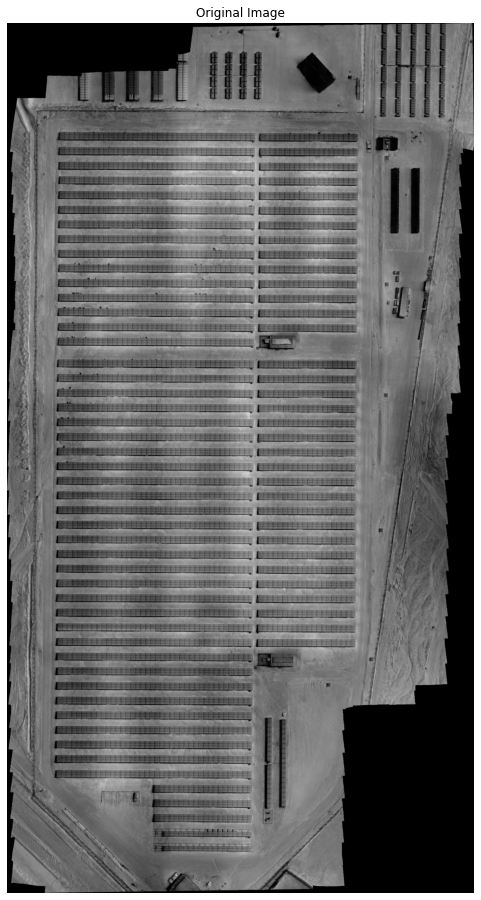

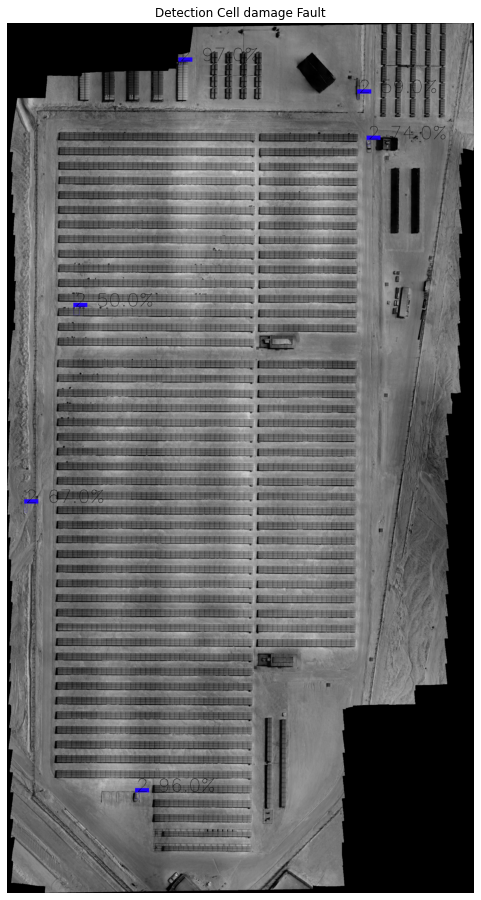

In [8]:
image = cv2.imread(image_path)


## Show original image
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Original Image')
plt.imshow(image, cmap='gray')
ax.axis('off') 

start = time.time()
## predict the bounding boxes
#boxes = get_yolo_boxes(infer_model, [image], net_h, net_w, config['model']['anchors'], obj_thresh, nms_thresh)[0]
boxes = detection_orto(infer_model, orto_image = image, div = div, net_h = net_h, net_w = net_w, 
               anchors = config['model']['anchors'], obj_thresh = obj_thresh, nms_thresh = nms_thresh)
print('Elapsed time = {}'.format(time.time() - start))
## draw bounding boxes on the image using labels
draw_boxes(image, boxes, config['model']['labels'], obj_thresh)


## Show Detection Fault
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Detection Cell damage Fault')
plt.imshow(image, cmap='gray')
ax.axis('off') 

## Load Trained Model Panel Disconnect

In [9]:
## Config of trained model, change this for use different trained model
config_path  = 'config_full_yolo_panel_infer.json' 

with open(config_path) as config_buffer:
        config = json.load(config_buffer)
                

###############################
#####   Load the model   ######
###############################
os.environ['CUDA_VISIBLE_DEVICES'] = config['train']['gpus']
infer_model = load_model(config['train']['saved_weights_name'])

#infer_model.summary()

## Parameters of detection
net_h, net_w = 416, 416 # a multiple of 32, the smaller the faster
obj_thresh, nms_thresh = 0.5, 0.3



## Detection Panel Disconnect

../panel_disconnect.py:23: RuntimeWarning: invalid value encountered in true_divide
  z_score = np.sum(image[np.int(ymin):np.int(ymax), np.int(xmin):np.int(xmax)]) / area


Elapsed time = 43.96634817123413


(-0.5, 3568.5, 6650.5, -0.5)

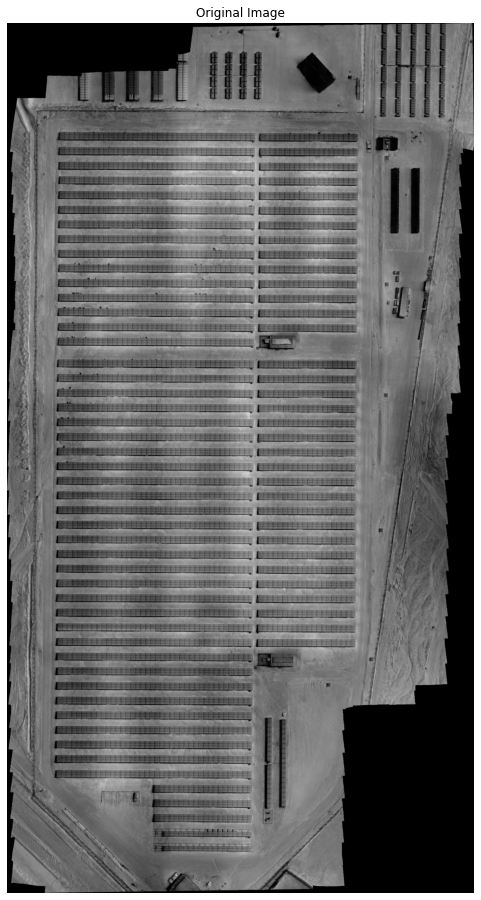

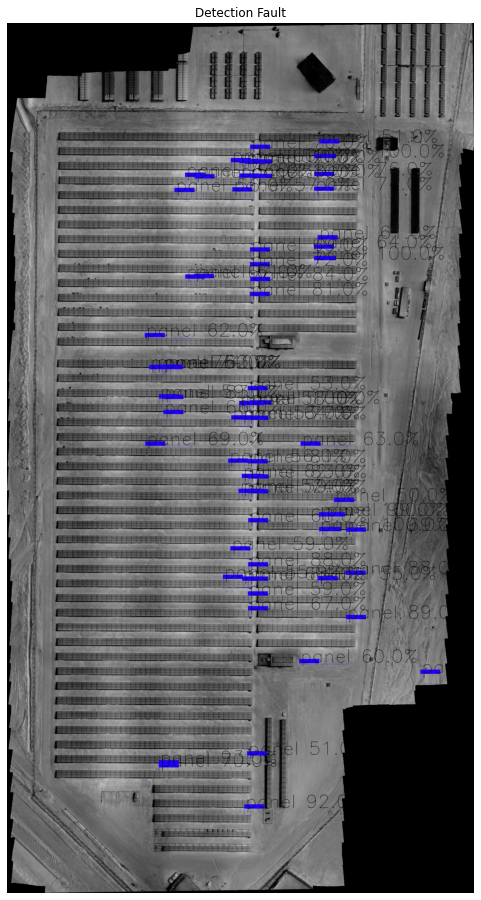

In [10]:
sys.path.insert(1, '../')
from panel_disconnect import disconnect

image = cv2.imread(image_path)


## Show original image
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Original Image')
plt.imshow(image, cmap='gray')
ax.axis('off') 

start = time.time()
## predict the bounding boxes
#boxes = get_yolo_boxes(infer_model, [image], net_h, net_w, config['model']['anchors'], obj_thresh, nms_thresh)[0]
boxes = detection_orto(infer_model, orto_image = image, div = div, net_h = net_h, net_w = net_w, 
               anchors = config['model']['anchors'], obj_thresh = obj_thresh, nms_thresh = nms_thresh)
boxes_panel = [box for box in boxes if box.get_score() > obj_thresh]

boxes_disc = disconnect(image, boxes_panel, z_thresh = 1.8)
print('Elapsed time = {}'.format(time.time() - start))
## draw bounding boxes on the image using labels
draw_boxes(image, boxes_disc, config['model']['labels'], obj_thresh)


## Show Detection Fault
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Detection Fault')
plt.imshow(image, cmap='gray')
ax.axis('off') 

## All in one

Elapsed time = 42.050947427749634
Elapsed time = 39.24048566818237
Elapsed time = 42.466670989990234
Elapsed time = 64.58358502388


(-0.5, 3568.5, 6650.5, -0.5)

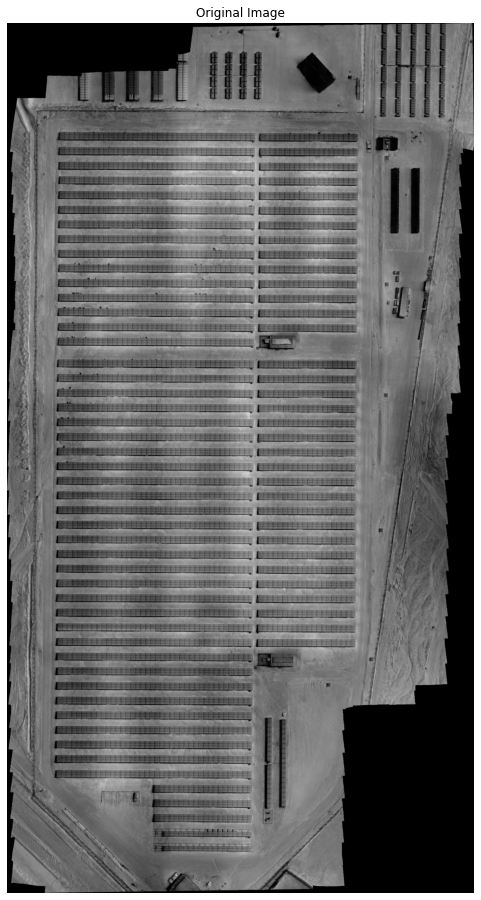

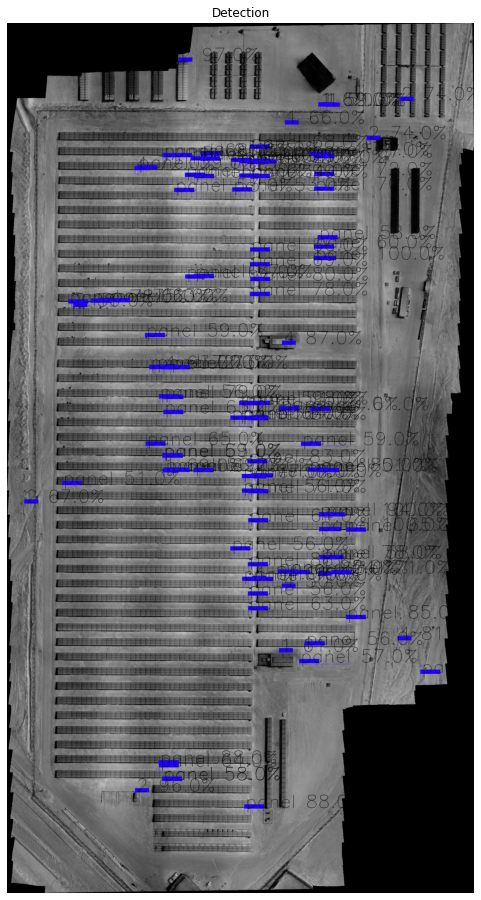

In [11]:
## Config of trained model, change this for use different trained model



list_config_path  = ['config_full_yolo_fault_1_infer.json', 
                'config_full_yolo_fault_2_infer.json', 
                'config_full_yolo_fault_4_infer.json', 
                'config_full_yolo_panel_infer.json']

list_name = ['soiling fault', 'diode fault', 'cell damage fault', 'panel disconnected']

image = cv2.imread(image_path)

## Show original image
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Original Image')
plt.imshow(image, cmap='gray')
ax.axis('off') 

for name, config_path in zip(list_name, list_config_path):
    
    with open(config_path) as config_buffer:
            config = json.load(config_buffer)


    ###############################
    #####   Load the model   ######
    ###############################
    os.environ['CUDA_VISIBLE_DEVICES'] = config['train']['gpus']
    infer_model = load_model(config['train']['saved_weights_name'])

    ## Parameters of detection
    net_h, net_w = 416, 416 # a multiple of 32, the smaller the faster
    obj_thresh, nms_thresh = 0.5, 0.3

    start = time.time()
    ## predict the bounding boxes
    #boxes = get_yolo_boxes(infer_model, [image], net_h, net_w, config['model']['anchors'], obj_thresh, nms_thresh)[0]
    boxes = detection_orto(infer_model, orto_image = image, div = div, net_h = net_h, net_w = net_w, 
                   anchors = config['model']['anchors'], obj_thresh = obj_thresh, nms_thresh = nms_thresh)
    
    if name == 'panel disconnected':
        
        boxes_panel = [box for box in boxes if box.get_score() > obj_thresh]
        boxes = disconnect(image, boxes_panel, z_thresh = 1.8)
        
    print('Elapsed time = {}'.format(time.time() - start))
    ## draw bounding boxes on the image using labels
    
    draw_boxes(image, boxes, config['model']['labels'], obj_thresh)


## Show Detection Fault

fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Detection')
plt.imshow(image, cmap='gray')
ax.axis('off') 



In [12]:
list_config_path.index(config_path)

3